In [1]:
# 💊 Bulk Dataset Analysis

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load bulk dataset
gdsc_bulk = pl.read_parquet("gdsc/gdsc_final_cleaned.parquet")

# Select only the relevant columns
gdsc_bulk = gdsc_bulk.select(["SANGER_MODEL_ID", "DRUG_ID", "LN_IC50"])

# Basic statistics
num_cell_lines = gdsc_bulk.select("SANGER_MODEL_ID").n_unique()
num_drugs = gdsc_bulk.select("DRUG_ID").n_unique()
num_pairs = gdsc_bulk.shape[0]

print(f"Unique Cell Lines: {num_cell_lines}")
print(f"Unique Drugs: {num_drugs}")
print(f"Total (Cell Line, Drug) Pairs: {num_pairs}")

Unique Cell Lines: 978
Unique Drugs: 621
Total (Cell Line, Drug) Pairs: 575197


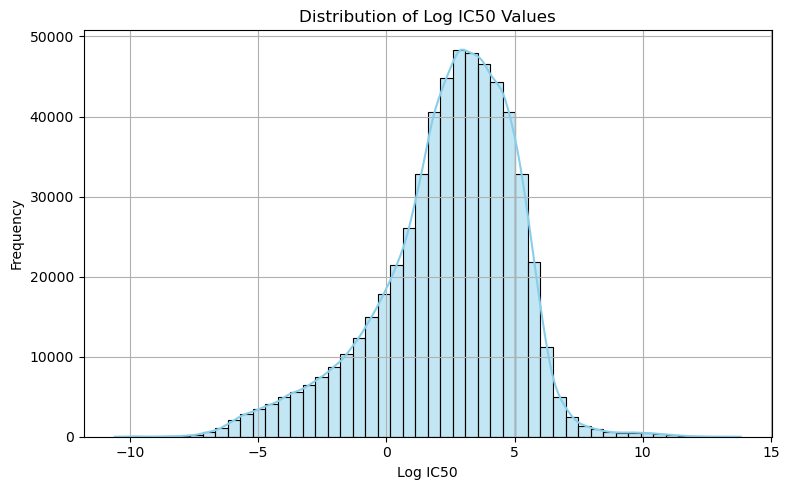

In [3]:
# Plot IC50 Distribution
# Polars doesn't integrate directly with seaborn/matplotlib, so convert to pandas
ic50_values = gdsc_bulk.select("LN_IC50").to_pandas()

plt.figure(figsize=(8, 5))
sns.histplot(ic50_values["LN_IC50"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Log IC50 Values")
plt.xlabel("Log IC50")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()